In [1]:
# Import relevant libraries and modules.

import pandas as pd
from sklearn import naive_bayes
from sklearn import model_selection
from sklearn import metrics


In [7]:
file_path = r"C:\Users\Lu LIANG\Desktop\extracted_nba_players_data.csv"
extracted_data = pd.read_csv(r"C:\Users\Lu LIANG\Desktop\extracted_nba_players_data.csv", index_col=0)

In [8]:
extracted_data.head(10)

,3p,ft,reb,ast,stl,blk,tov,target_5yrs,total_points,efficiency
fg,,,,,,,,,,
34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,0,266.4,9.722628
29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,0,252.0,9.368030
42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,0,384.8,25.150327
42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,1,330.6,28.500000
52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,1,216.0,18.782609
42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,0,277.5,24.342105
43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,1,409.2,37.541284
41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,1,273.6,26.563107
39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,0,156.0,15.757576


## Step 2: Model preparation

In [9]:
# Define the y (target) variable.

### YOUR CODE HERE ###
y = extracted_data['target_5yrs']

# Define the X (predictor) variables.

### YOUR CODE HERE ###
X = extracted_data.drop('target_5yrs', axis = 1)

### Display the first 10 rows of your target data

Display the first 10 rows of your target and predictor variables. This will help you get a sense of how the data is structured.

In [10]:
# Display the first 10 rows of your target data.

### YOUR CODE HERE ###

y.head(10)

fg
34.7    0
29.6    0
42.2    0
42.6    1
52.4    1
42.3    0
43.5    1
41.5    1
39.2    0
38.3    0
Name: target_5yrs, dtype: int64

In [11]:
# Display the first 10 rows of your predictor variables.

### YOUR CODE HERE ###

X.head(10)

,3p,ft,reb,ast,stl,blk,tov,total_points,efficiency
fg,,,,,,,,,
34.7,25.0,69.9,4.1,1.9,0.4,0.4,1.3,266.4,9.722628
29.6,23.5,76.5,2.4,3.7,1.1,0.5,1.6,252.0,9.368030
42.2,24.4,67.0,2.2,1.0,0.5,0.3,1.0,384.8,25.150327
42.6,22.6,68.9,1.9,0.8,0.6,0.1,1.0,330.6,28.500000
52.4,0.0,67.4,2.5,0.3,0.3,0.4,0.8,216.0,18.782609
42.3,32.5,73.2,0.8,1.8,0.4,0.0,0.7,277.5,24.342105
43.5,50.0,81.1,2.0,0.6,0.2,0.1,0.7,409.2,37.541284
41.5,30.0,87.5,1.7,0.2,0.2,0.1,0.7,273.6,26.563107
39.2,23.3,71.4,0.8,2.3,0.3,0.0,1.1,156.0,15.757576


The data indicates that all of the predictor variables are continuous numerical values, so it is important that the model selected is suitable for continuous features.

### Perform a split operation on your data

Divide your data into a training set (75% of data) and test set (25% of data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not observed. This tests how well the model generalizes—or performs—on new data.

In [12]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

### YOUR CODE HERE ###

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.25, random_state=0)

In [13]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.

### YOUR CODE HERE ###

print(X_train.shape)

# Print the shape of X_test.

### YOUR CODE HERE ###

print(X_test.shape)

# Print the shape of y_train.

### YOUR CODE HERE ###

print(y_train.shape)

# Print the shape of y_test.

### YOUR CODE HERE ###

print(y_test.shape)

(1005, 9)
(335, 9)
(1005,)
(335,)


## Step 3: Model building

Using the assumption that your features are normally distributed and continuous, the Gaussian Naive Bayes algorithm is most appropriate for your data. While your data may not perfectly adhere to these assumptions, this model will still yield the most usable and accurate results. 

In [16]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.

### YOUR CODE HERE ###

nb = naive_bayes.GaussianNB()

# Fit the model on your training data.

### YOUR CODE HERE ###

nb.fit(X_train, y_train)

# Apply your model to predict on your test data. Call this "y_pred".

### YOUR CODE HERE ###

y_pred = nb.predict(X_test)

### Leverage metrics to evaluate your model's performance

To evaluate the data yielded from your model, you can leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values

In [17]:
# Print your accuracy score.

### YOUR CODE HERE ###

print('accuracy score:'), print(metrics.accuracy_score(y_test, y_pred))

# Print your precision score.

### YOUR CODE HERE ###

print('precision score:'), print(metrics.precision_score(y_test, y_pred))

# Print your recall score.

### YOUR CODE HERE ###

print('recall score:'), print(metrics.recall_score(y_test, y_pred))

# Print your f1 score.

### YOUR CODE HERE ###

print('f1 score:'), print(metrics.f1_score(y_test, y_pred))

accuracy score:
0.6955223880597015
precision score:
0.8243243243243243
recall score:
0.6161616161616161
f1 score:
0.7052023121387283


(None, None)

### Gain clarity with the confusion matrix

Recall that a confusion matrix is a graphic that shows your model's true and false positives and negatives. It helps to create a visual representation of the components feeding into the metrics.

Create a confusion matrix based on your predicted values for the test set.

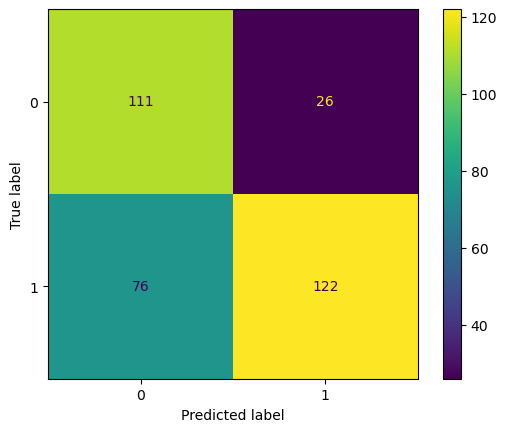

In [19]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.

### YOUR CODE HERE ###

cm = metrics.confusion_matrix(y_test, y_pred)

# Create the display for your confusion matrix.

### YOUR CODE HERE ###

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb.classes_)

# Plot the visual in-line.

### YOUR CODE HERE ###

disp.plot()